In [1]:
#image classification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
#wewill use 60,000 images all 28by28 and 
#10,000 of them to evaluate how accurate the network learns to classify

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#loading data returns 4 numpy arrays
#there are train_images and train_labels arrays. the model uses data to learn

#the model is tested against the test set. test_images and test_labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
#lets explore data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape, len(test_images)

((10000, 28, 28), 10000)

In [14]:
## preprocessing the data

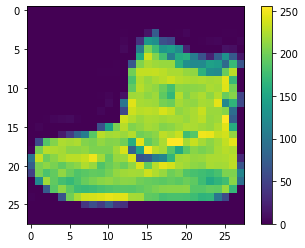

In [15]:
#inspecting the first images range is (0-255)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

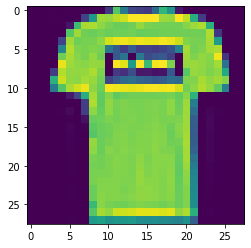

In [16]:
plt.imshow(train_images[1])

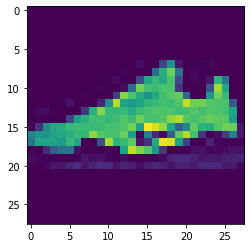

In [21]:
plt.imshow(test_images[999])
plt.grid(False)
plt.show()

In [22]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
#scaling the range to 0 - 1 before feeding them the neural network model
#to do so we just divide by 255
#both training set and testing set MUST be preprocessed in the sme way

train_images = train_images/255.0
test_images = test_images/255.0 

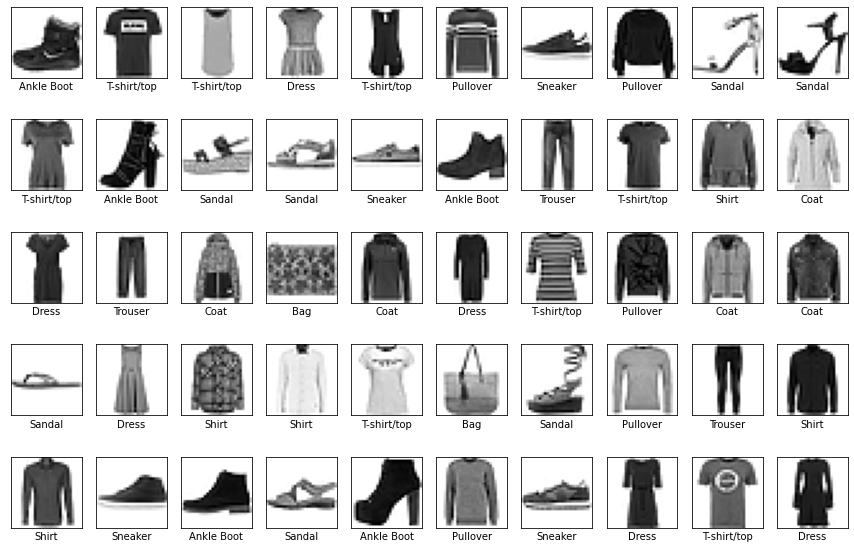

In [32]:
plt.figure(figsize=(15,10))
for i in range(50):
  plt.subplot(5,10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [33]:
## buildingthe model - requires configuring the layers of the model then compile the model

#set up layers
#basic building block of a neural network is a layer
#layers extract representations from data fed into them
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [34]:
#the fist tf.keras.layersFlatten transforms the format of the images from 2-dimentional (28x28) to 1-dimention(28*28=784)
#tf.keras.layers.Dense is fully connected neural layers. the first Dense has 128 nodes/neurons
#each node contains a score that indicates the current images belongs to one of the 10 classes

In [35]:
#compiling the model

In [37]:
#before the training starts we need more settings. these are added in model's compile step

#loss function - this measures how accurate the model is during training
#optimizer - how the model is updated based on the data it sees and its loss function
#metrics - used to monitor the training and testing steps. 

#following example uses accuracy, the fraction of images that are correctly classified
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
#training the model - using following steps

In [40]:
# 1. feed the training data to the model - train_images, train_labels arrays
# 2. the model learns to associate images and labels
# 3. we ask the model to make predictions about a test set - test_images array
# 4. verify the prediction really matches the label from test_labels array

In [42]:
#feeding the model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5017 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3741 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3131 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [44]:
#evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest Accuracy: {}'.format(test_acc))

313/313 - 0s - loss: 0.3447 - accuracy: 0.8748

Test Accuracy: 0.8748000264167786


In [45]:
#making predictions

In [46]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(test_images)

In [48]:
predictions[0]

array([1.5490473e-07, 7.3841832e-08, 3.8762685e-10, 4.9248717e-07,
       1.6299488e-08, 7.3893555e-04, 1.0625849e-06, 5.1678587e-03,
       1.2465339e-06, 9.9409002e-01], dtype=float32)

In [49]:
np.argmax(predictions[0])

9

In [50]:
test_labels[0]

9

In [59]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [52]:
#verify predictions

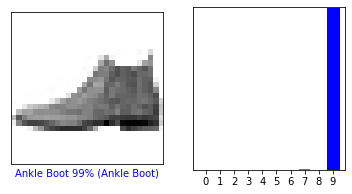

In [60]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

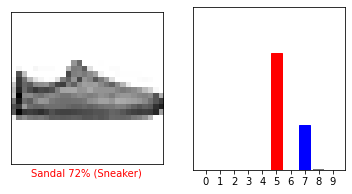

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [63]:
#multiple

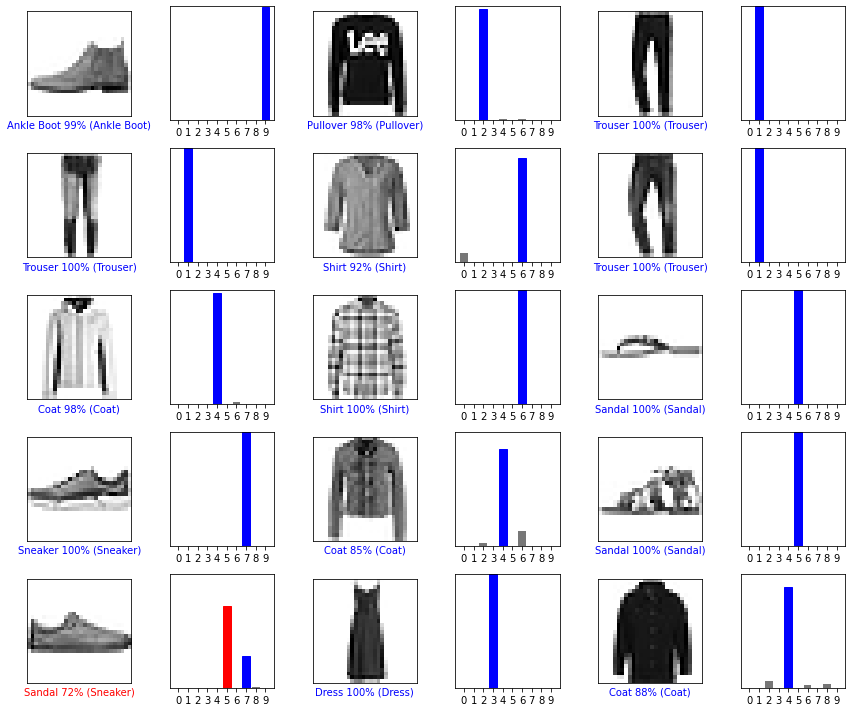

In [64]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [66]:
#using the trained model
#grabbing an image from the dataset
img = test_images[1]
print(img.shape)

(28, 28)


In [67]:
#add the image to a batch where its the only member
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [68]:
#predict the correct label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.7695510e-04 5.3690878e-11 9.7904676e-01 7.6777906e-07 8.7495809e-03
  3.1122284e-12 1.2025782e-02 4.6468282e-13 1.2160471e-08 1.8538868e-11]]


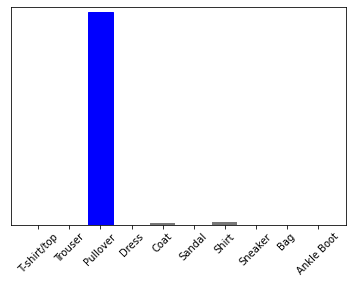

In [70]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

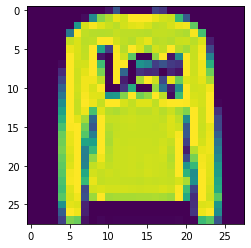

In [72]:
plt.imshow(img[0])

In [73]:
np.argmax(predictions_single[0])

2

In [74]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
#used tensorflow official tutorial here at https://www.tensorflow.org/tutorials/keras/classification